<a href="https://colab.research.google.com/github/noahsark-cloud/noahsark-cloud/blob/main/project_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files

uploaded = files.upload()

# Assuming the file is named 'sales_data.csv'
df = pd.read_csv('sales_data.csv')


Saving sales_data.csv to sales_data.csv


In [4]:
df.head()


,Date,Sales,Category
0,2023-01-01,390,Home Appliances
1,2023-01-02,468,Electronics
2,2023-01-03,102,Home Appliances
3,2023-01-04,215,Clothing
4,2023-01-05,162,Books


In [5]:
df.isnull().sum()


,0
Date,0
Sales,0
Category,0


In [6]:
df.fillna(0, inplace=True)  # Example of filling missing values with 0


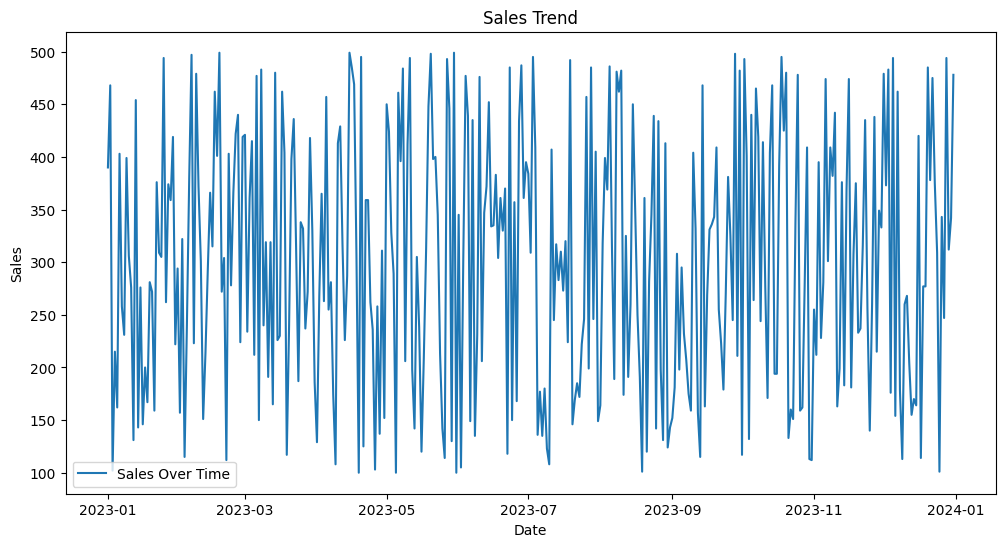

In [7]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if not already
df.set_index('Date', inplace=True)

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Sales Over Time')
plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


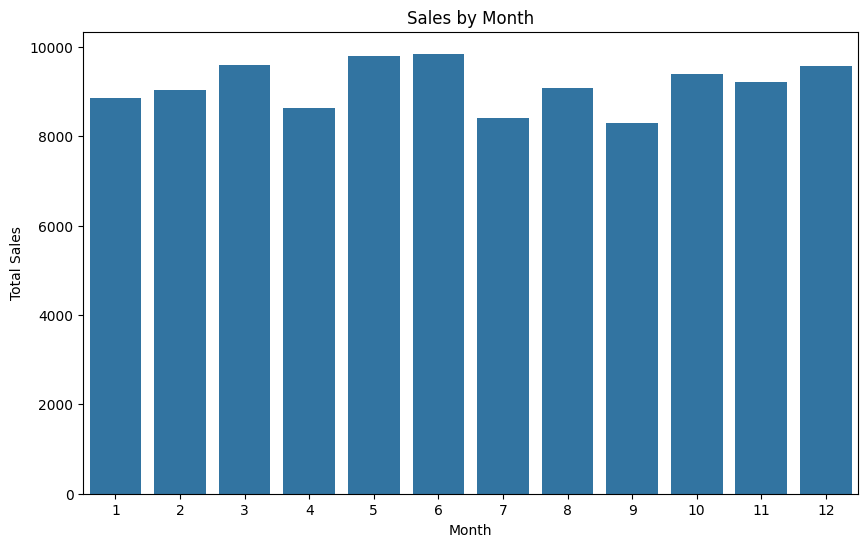

In [8]:
df['Month'] = df.index.month
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


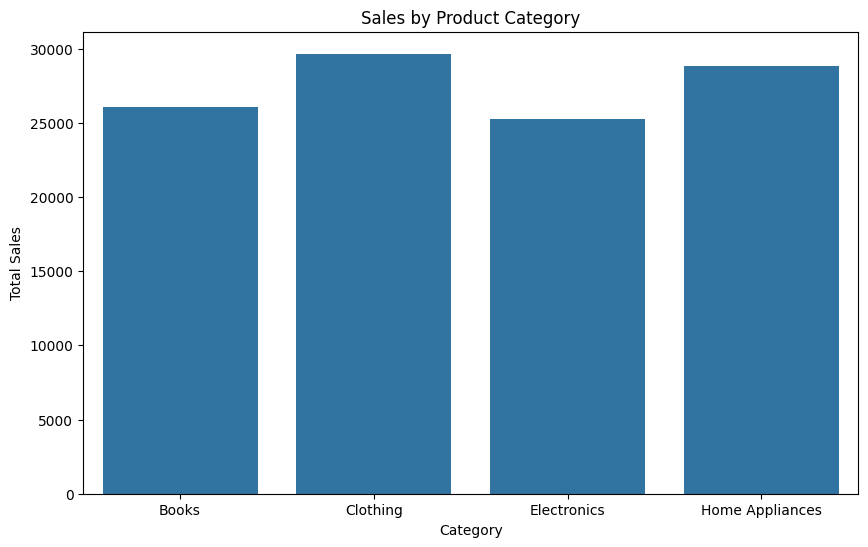

In [9]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


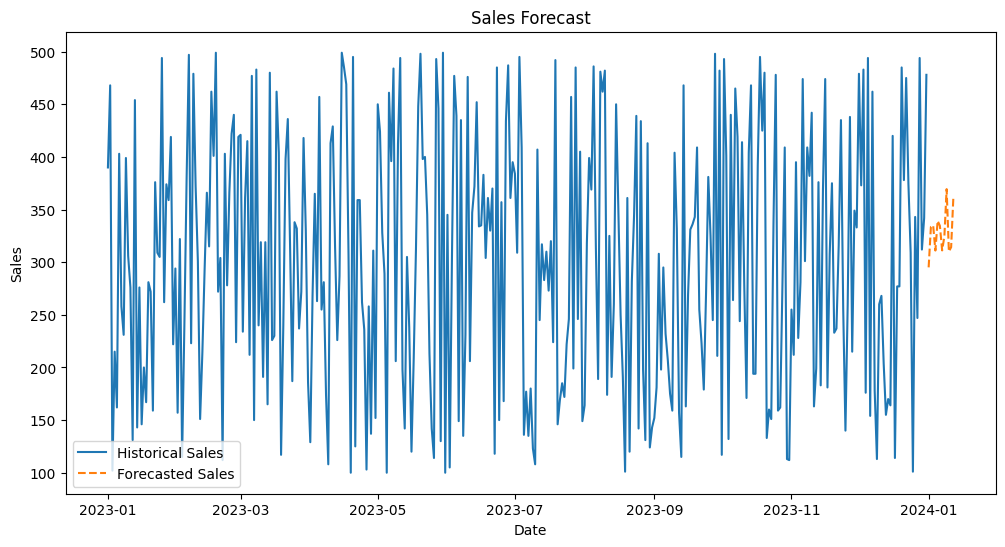

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Model fitting
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast for the next 12 months
forecast = fit.forecast(12)

plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [11]:
plt.savefig('sales_trend.png')


<Figure size 640x480 with 0 Axes>